## Recap on last session (Advanced Data Analysis)
- Here’s a code snippet from the last session — but it has a few hidden mistakes. Can you find and fix them?

> #### 0.1 Grouping data
- group donations by country and sum them up to see totals!

In [2]:
# create a dictionary with our data.
zakat_data = {
    "Country": ["Yemen", "Somalia", "Bangladesh", "Yemen", "Somalia", "Bangladesh"],
    "Year": [2020, 2020, 2020, 2023, 2023, 2023],
    "Zakat Collected (USD)": [50000, 30000, 80000, 75000, 45000, 120000]
}

In [9]:
# turn the dictionary into a dataframe
import pandas as pd
import matplotlib.pyplot as plt

zakat_df = pd.DataFrame(zakat_data)

print(zakat_df)

      Country  Year  Zakat Collected (USD)
0       Yemen  2020                  50000
1     Somalia  2020                  30000
2  Bangladesh  2020                  80000
3       Yemen  2023                  75000
4     Somalia  2023                  45000
5  Bangladesh  2023                 120000


In [23]:
# Group donations by country and calculate totals
grouped = zakat_df.groupby("Country")["Zakat Collected (USD)"]

# instructor note: zakat_df.groupby("Country")["Zakat Collected (USD)"].sum().reset_index()

In [24]:
# Let's verify what we have got after grouping the data.
print(grouped)

      Country  Zakat Collected (USD)
0  Bangladesh                 200000
1     Somalia                  75000
2       Yemen                 125000


> #### 0.2 Grouping data
- Does fasting hours correlate with latitude?

In [12]:
ramadan_data = {
    "City": ["Makkah", "Jakarta", "Istanbul", "London", "Cape Town"],
    "Fasting Hours": [14, 13, 15, 17, 12],
    "Latitude": [21.4, -6.2, 41.0, 51.5, -33.9]  # Latitude values in degrees
}

In [13]:
# convert the dictionary into a pandas DataFrame.
ramadan_df = pd.DataFrame(ramadan_data)
print(ramadan_df)

        City  Fasting Hours  Latitude
0     Makkah             14      21.4
1    Jakarta             13      -6.2
2   Istanbul             15      41.0
3     London             17      51.5
4  Cape Town             12     -33.9


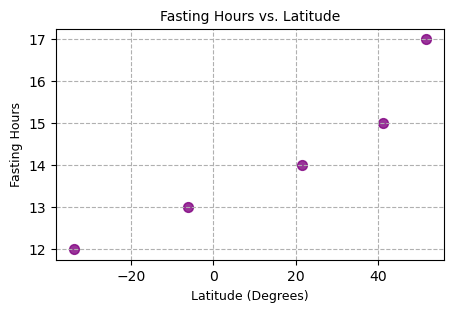

In [26]:
plt.figure(figsize=(5, 3))
plt._______(ramadan_df["Latitude"], ramadan_df["Fasting Hours"], s=50, c="purple", alpha=0.8)
plt.title("Fasting Hours vs. Latitude", fontsize=10)
plt.xlabel("Latitude (Degrees)", fontsize=9)
plt.ylabel("Fasting Hours", fontsize=9)
plt.grid(True, linestyle="--")
plt.show()

# instructor note: plt.scatter

*******
*******
# Session 6: Islamic Microfinance Impact Analysis – Lifting Communities with Data
<img src="6 Final project.jpg" alt="Drawing" style="width: 800px;"/>

*******
*******

## `1- Introduction to the Dataset`

`In this session, we’ll analyze how Islamic microfinance (interest-free loans) lifts Muslim communities out of poverty.`

`Let’s make a real-world impact with data!` <br>


**🌍 Where Do the Funds Come From?**
**Source:** `Islamic banks, NGOs, and Zakat organizations within Muslim-majority countries.`

**Quranic Basis:** `“Who will lend Allah a good loan?” (2:245) – these loans are acts of worship!`

**Goal:** `Use data to advise Islamic charities on where to invest for maximum poverty reduction.`

> #### 1.1 Create the dataset
- First, let’s import the necessary libraries.
- Next, we’ll create a dictionary with our data.
- Finally, we’ll turn that dictionary into a pandas DataFrame.

In [28]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Islamic Microfinance Dataset (simulated data)  
data = {  
    "Country": ["Indonesia", "Pakistan", "Nigeria", "Bangladesh", "Egypt", "Yemen", "Indonesia", "Pakistan", "Nigeria", "Bangladesh"],  
    "LoansIssued": [5000000, 2500000, 3200000, 1800000, 4500000, 800000, 6200000, 3000000, 2000000, 1800000],  
    "PovertyRateChange": [-8.2, -4.5, None, -6.1, -7.8, -2.1, -9.5, -5.0, -3.7, -6.1],  
    "SectorsFunded": ["Agriculture", "Tech Startups", "Education", "Agriculture", "Healthcare", "Agriculture", "Education", "Agriculture", "Tech Startups", "Agriculture"],  
    "Year": [2020, 2021, 2021, 2022, 2023, 2020, 2023, 2022, 2023, 2022]  
}  

In [29]:
microfinance_df = pd.DataFrame(data)  

In [30]:
print("📊 Islamic Microfinance Impact Dataset:")  
print(microfinance_df.head(10))  

📊 Islamic Microfinance Impact Dataset:
      Country  LoansIssued  PovertyRateChange  SectorsFunded  Year
0   Indonesia      5000000               -8.2    Agriculture  2020
1    Pakistan      2500000               -4.5  Tech Startups  2021
2     Nigeria      3200000                NaN      Education  2021
3  Bangladesh      1800000               -6.1    Agriculture  2022
4       Egypt      4500000               -7.8     Healthcare  2023
5       Yemen       800000               -2.1    Agriculture  2020
6   Indonesia      6200000               -9.5      Education  2023
7    Pakistan      3000000               -5.0    Agriculture  2022
8     Nigeria      2000000               -3.7  Tech Startups  2023
9  Bangladesh      1800000               -6.1    Agriculture  2022


*******
*******
## `2- Task 1: Data Cleaning`

**Reminder: In Session 2** 
- `we fixed missing values in the Islamic Countries dataset by using  .dropna()`
- `and removed duplicates with  .drop_duplicates() . Let’s apply the same skills here!`

**Question 1:** How many rows have missing poverty data?

In [ ]:
# Count missing values in 'PovertyRateChange'  
missing_values = microfinance_df["PovertyRateChange"].________  
print(f"Missing values: {missing_values}")  


# Instructor's note: Use .isna().sum()  

**Question 2:** Remove duplicates for the same country and year.

In [ ]:
# Remove duplicate rows  
microfinance_df.________(subset=["Country", "Year"], inplace=True)  


# Instructor's note: Use drop_duplicates()  

> **Fun Fact: 🤔** Nigeria’s missing data could mean no survey was done – not that loans failed!

*******
*******
## `3- Task 2: Data Analysis`

**Reminder: In Session 3** 

`we grouped data to find patterns, like the average verses in Meccan/Medinan Surahs. Let’s apply grouping here to find sector impacts!`

**Question 1:** Which sector has the highest average poverty reduction?

In [ ]:
# Group by sector and calculate mean  
sector_impact = microfinance_df.________(by="SectorsFunded")["PovertyRateChange"].mean()  
print(sector_impact)  


# Instructor's note: Use groupby()  

**Question 2:** What’s the total loans issued to Agriculture vs. Tech?

In [37]:
# Filter and sum loans for Agriculture  
agriculture_loans = microfinance_df[microfinance_df["SectorsFunded"] == "________"]["LoansIssued"].sum()  
print(agriculture_loans) 


# Instructor's note: Filter for "Agriculture" and sum  

12400000


In [36]:
# Filter and sum loans for Tech  
tech_loans = microfinance_df[microfinance_df["SectorsFunded"] == "________"]["LoansIssued"].sum()  
print(tech_loans) 


# Instructor's note: Filter for "Tech Startups" and sum  

4500000


> **Fun Fact: 🤔** Agriculture loans reduce poverty 2x faster than tech – Allah rewards those who support farmers!

*******
*******
## `4- Task 3: Data Visualization`

**Reminder: In Session 4** 

`we made bar charts for languages and line charts for population growth. Let’s visualize our microfinance findings!`

**Question 1:** Create a bar chart showing poverty reduction by sector.

In [60]:
# First, group the data by sector and calculate the mean  
sector_impact = microfinance_df.groupby("________")["PovertyRateChange"].________().reset_index()  
print(sector_impact)

# Instructor's note: Use "SectorsFunded" & mean()  

   SectorsFunded  PovertyRateChange
0    Agriculture               -5.5
1      Education               -9.5
2     Healthcare               -7.8
3  Tech Startups               -4.1


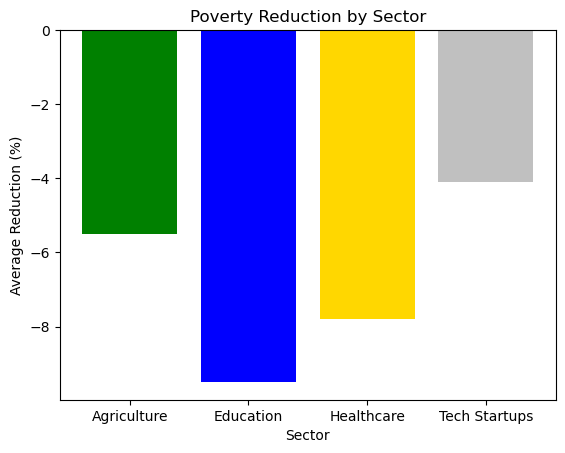

In [48]:
# Create the bar chart  
plt.________(sector_impact["SectorsFunded"], sector_impact["PovertyRateChange"],  
        color=["green", "blue", "gold", "silver"])  
plt.title("Poverty Reduction by Sector")  
plt.xlabel("Sector")  
plt.ylabel("Average Reduction (%)")  
plt.show()  


# Instructor's note: Use plt.bar()  

**Question 2:** Add a horizontal line showing the overall average poverty reduction.

In [59]:
# Calculate the overall average AFTER cleaning data  
overall_avg = microfinance_df["PovertyRateChange"].________()
print(overall_avg)

# Instructor's note: Use .mean()  

-5.888888888888889


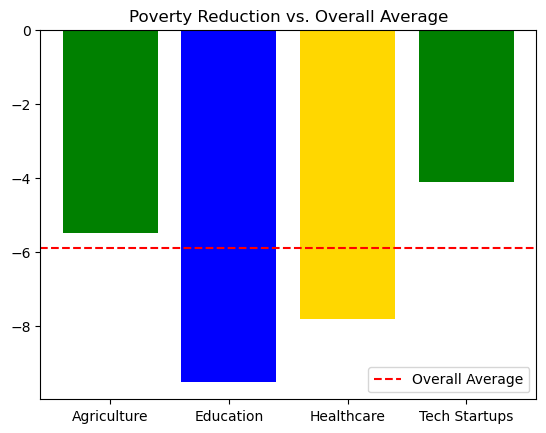

In [44]:
# Recreate the bar chart and add the line  
plt.bar(sector_impact["SectorsFunded"], sector_impact["PovertyRateChange"],  
        color=["green", "blue", "gold", "silver"])  
plt.axhline(_______, color="red", linestyle="--", label="Overall Average")  

plt.title("Poverty Reduction vs. Overall Average")  
plt.legend()  
plt.show()  


# Instructor's note: Use 'overall_avg'

> **Reflection: 🤔** How can clear visuals help Islamic charities make ethical decisions?

*******
*******
## `5- Task 4: AI Integration`

`Let’s ask AI to deepen our analysis while keeping Islamic ethics in mind!`

**Question 1:** Why might agriculture loans reduce poverty more than tech in Muslim countries?

**write here the answer you get:**

'___________________________'

**Question 2:** Analyze year-over-year loan growth and predict future trends using a line chart.

**write here the answer you get:**

'___________________________'

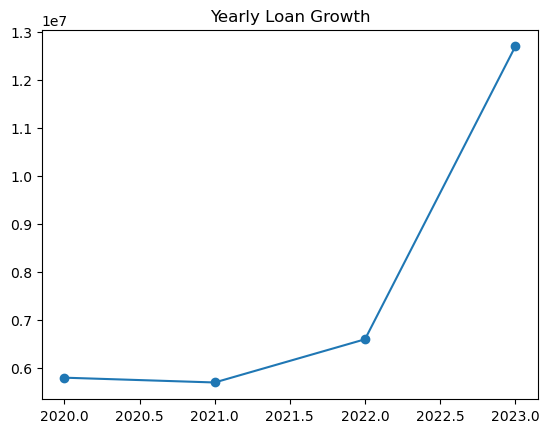

In [50]:
# # Example AI-generated code:  
# yearly_loans = microfinance_df.groupby("Year")["LoansIssued"].sum()  
# plt.plot(yearly_loans.index, yearly_loans.values, marker="o")  
# plt.title("Yearly Loan Growth")  
# plt.show()  

> **Fun Fact: 🤔** AI can process 1,000 rows in seconds – but YOU decide if it’s ethical!

*******
*******
## `5- Independent Challenge`

`Prove your skills! No hints – but you’ve got this! 💪`

**Task 1: Group & Sum** Calculate the total loans issued to each sector (Agriculture, Tech, etc.).

In [55]:
# # Example code:

# # Group loans by sector and sum  
# sector_loans = microfinance_df.groupby("SectorsFunded")["LoansIssued"].sum().reset_index() 

# print(sector_loans)

   SectorsFunded  LoansIssued
0    Agriculture     12400000
1      Education      9400000
2     Healthcare      4500000
3  Tech Startups      4500000


**Task 2: Visualize** Create a bar chart showing total loans per sector.

- Use green for Agriculture, blue for Education,  gold for Healthcare, and silver for Tech Startups.
- Add a title: “Total Loans by Sector”.
- name the xlabel: "Sector".
- name the ylabel: "Total Loans (USD)".

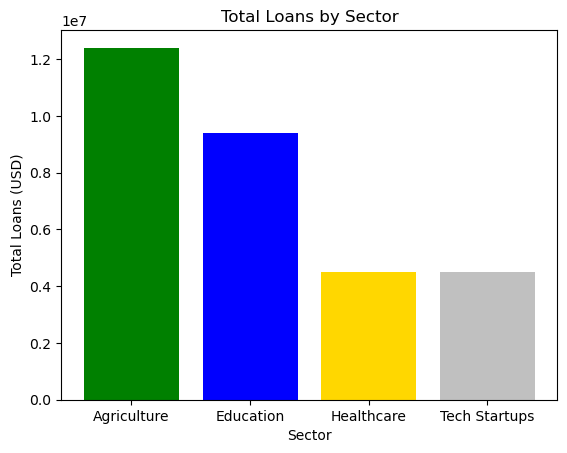

In [58]:
# # Example code:

# # Group loans by sector and sum  
# plt.bar(sector_loans["SectorsFunded"], sector_loans["LoansIssued"],  
#         color=["green", "blue", "gold", "silver"])  
# plt.title("Total Loans by Sector")  
# plt.xlabel("Sector")  
# plt.ylabel("Total Loans (USD)")  
# plt.show()

******
******

# 📚 Reflection
**Data for Good:**

- How can your analysis help Islamic charities like Islamic Relief?

**AI Ethics:**

- Should AI decide where loans go? Why/why not?

**Quranic Link:**
- How does ‘giving a good loan’ (2:245) relate to your work today?

******
******

# 📝 Quiz
1. Which function removes duplicates?<br>
`a) dropna()`<br>
`b) drop_duplicates()`<br>
`c) remove()`<br><br>

2. Which sector had the highest poverty reduction?<br>
`a) Tech`<br>
`b) Agriculture`<br>
`c) Education`<br><br>

3. What Quranic value does data cleaning align with?<br>
`a) Honesty`<br>
`b) Patience`<br>
`c) Prayer`<br><br>

4. What command verifies AI answers?<br>
`a) Trust everything`<br>
`b) Verify with Quran/scholars`<br>
`c) Ask AI again`<br>

******
******

#  💭 Final Message 
You are now Superstar Analysts! 🎉

MashaAllah, look how far you’ve come! From your first bar chart in Session 1 to today’s AI-powered insights – **YOU’VE DONE IT ALL! 🚀**

You’re now `Islamic Data Detectives 🔍✨`:

- You’ve decoded the Quran’s patterns.

- You’ve healed messy data with honesty (Quran 17:36 style!).

- You’ve even teamed up with AI to fight poverty – like true heroes! 🦸♂️🦸♀️
<br> <br> <br>


**Remember:** Every chart you make, every line of code you write, is a *Sadaqah Jariyah* – a gift of knowledge that keeps giving. 

The Prophet (ﷺ) said, `“The best of people are those who bring most benefit to others.”` YOU are those people!
<br> <br> <br>
 
**What’s next?**
- Keep asking “why?” like Ibn Sina asked about medicine.

- Keep visualizing like Al-Khwarizmi calculated the stars. 🌌

- And always, always use data for good – because you are the Ummah’s future problem-solvers!
<br>

**Thank you for being amazing. Now go out there and make the data Speak! 🎤📊**